In [1]:
from system import * 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy.optimize import curve_fit

In [85]:
Lx = 150
Ly = 200

s = System(Lx,Ly)
s.set_plane_initial_conditions()
s.DI = 1
s.gamma = .2
s.beta = 1
s.dt = .1

/tmp/ipykernel_52135/1654127101.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0',str(np.round(s.I.max().get()/2,1)),str(np.round(s.I.max().get(),1))])


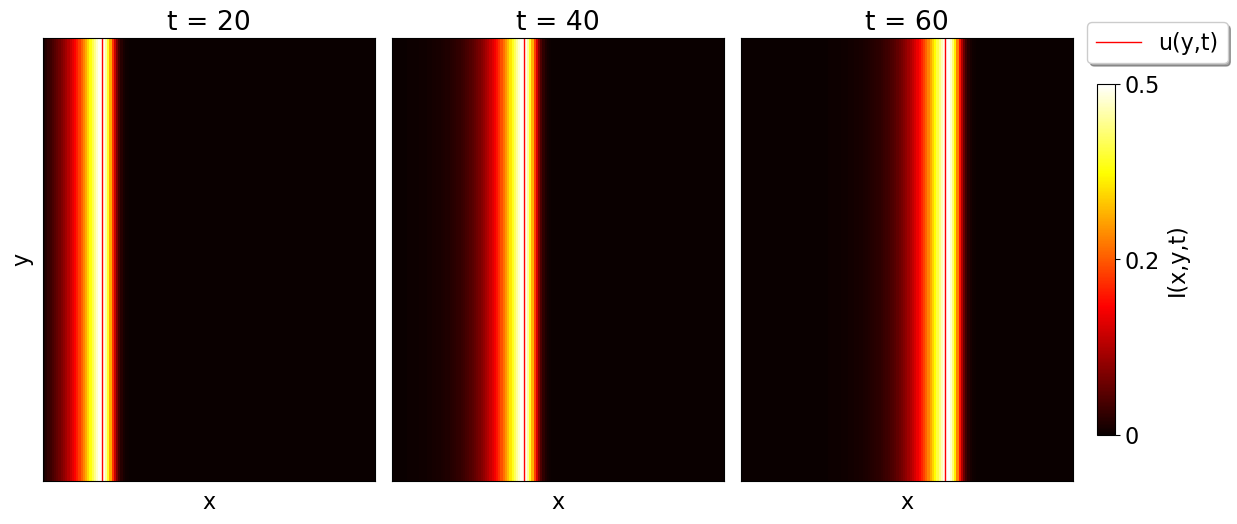

In [102]:
fig,ax = plt.subplots(1,3,figsize=(16,12))

it = 200
y = np.linspace(0,Ly,Ly)

for i in range(3):
    s.solve(it)
    ax[i].imshow(s.I.get(),cmap = 'hot' , interpolation='none')
    ax[i].plot(s.u().get(),y,'r',linewidth=1)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlabel('x')
    ax[i].set_title('t = {:.0f}'.format(s.t))
    ax[i].set_ylim(0,Ly)

ax[0].set_ylabel('y')
plt.rcParams.update({'font.size': 16})

fig.subplots_adjust(wspace=0.05, hspace=0.05)
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='hot'), ax = ax.ravel().tolist(),orientation='vertical', shrink=0.38, pad=0.02, label='I(x,y,t)')
cbar.ax.set_yticklabels(['0',str(np.round(s.I.max().get()/2,1)),str(np.round(s.I.max().get(),1))])
cbar.ax.set_yticks([0,0.5,1])
ax[-1].legend(['u(y,t)'], loc='upper right', bbox_to_anchor=(1.5, 1.06), ncol=1, fancybox=True, shadow=True, fontsize=16)

s.reset()
s.set_plane_initial_conditions()

plt.savefig('/home/renzo/Tesis_M/tesis/Tesis_Tex/figs/cap4/h_case.pdf',bbox_inches='tight',dpi=300)

plt.show()


In [103]:
Lx = 150
Ly = 200

s = System(Lx,Ly)
s.set_plane_initial_conditions()
s.set_dic_beta(p=0.3)
s.DI = 1
s.gamma = .2
s.dt = .1

/tmp/ipykernel_52135/32839520.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0',str(np.round(s.I.max().get()/2,1)),str(np.round(s.I.max().get(),1))])


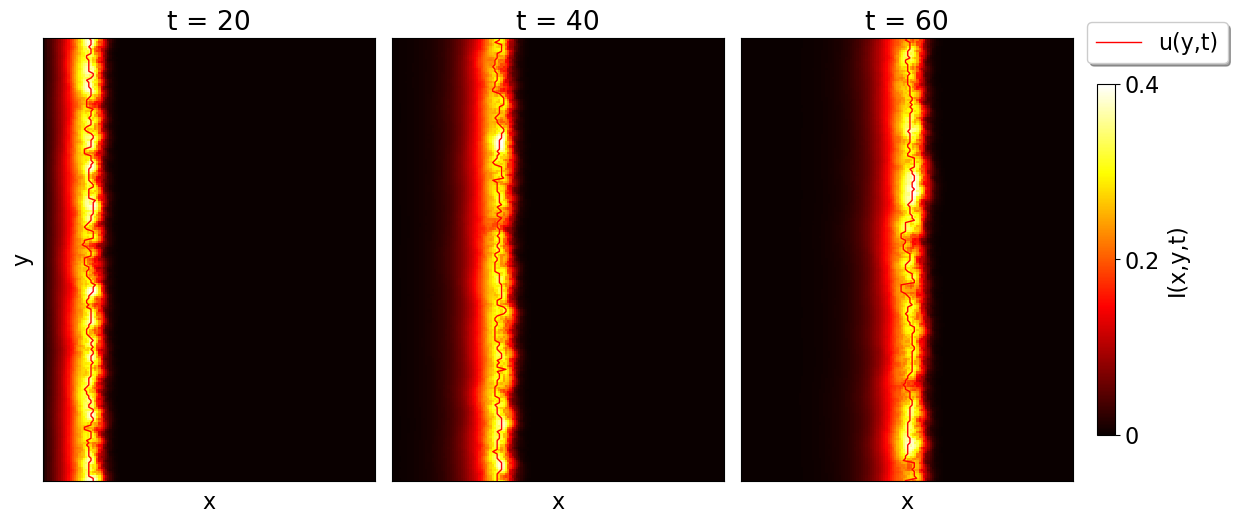

In [104]:
fig,ax = plt.subplots(1,3,figsize=(16,12))

it = 200
y = np.linspace(0,Ly,Ly)

for i in range(3):
    s.solve(it)
    ax[i].imshow(s.I.get(),cmap = 'hot' , interpolation='none')
    ax[i].plot(s.u().get(),y,'r',linewidth=1)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlabel('x')
    ax[i].set_title('t = {:.0f}'.format(s.t))
    ax[i].set_ylim(0,Ly)

ax[0].set_ylabel('y')
plt.rcParams.update({'font.size': 16})

fig.subplots_adjust(wspace=0.05, hspace=0.05)
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='hot'), ax = ax.ravel().tolist(),orientation='vertical', shrink=0.38, pad=0.02, label='I(x,y,t)')
cbar.ax.set_yticklabels(['0',str(np.round(s.I.max().get()/2,1)),str(np.round(s.I.max().get(),1))])
cbar.ax.set_yticks([0,0.5,1])
ax[-1].legend(['u(y,t)'], loc='upper right', bbox_to_anchor=(1.5, 1.06), ncol=1, fancybox=True, shadow=True, fontsize=16)

s.reset()
s.set_plane_initial_conditions()

plt.savefig('/home/renzo/Tesis_M/tesis/Tesis_Tex/figs/cap4/da_case.pdf',bbox_inches='tight',dpi=300)

plt.show()

## Velocidad DA vs H

 15%|█▌        | 3/20 [14:27<1:21:53, 289.01s/it]


KeyboardInterrupt: 

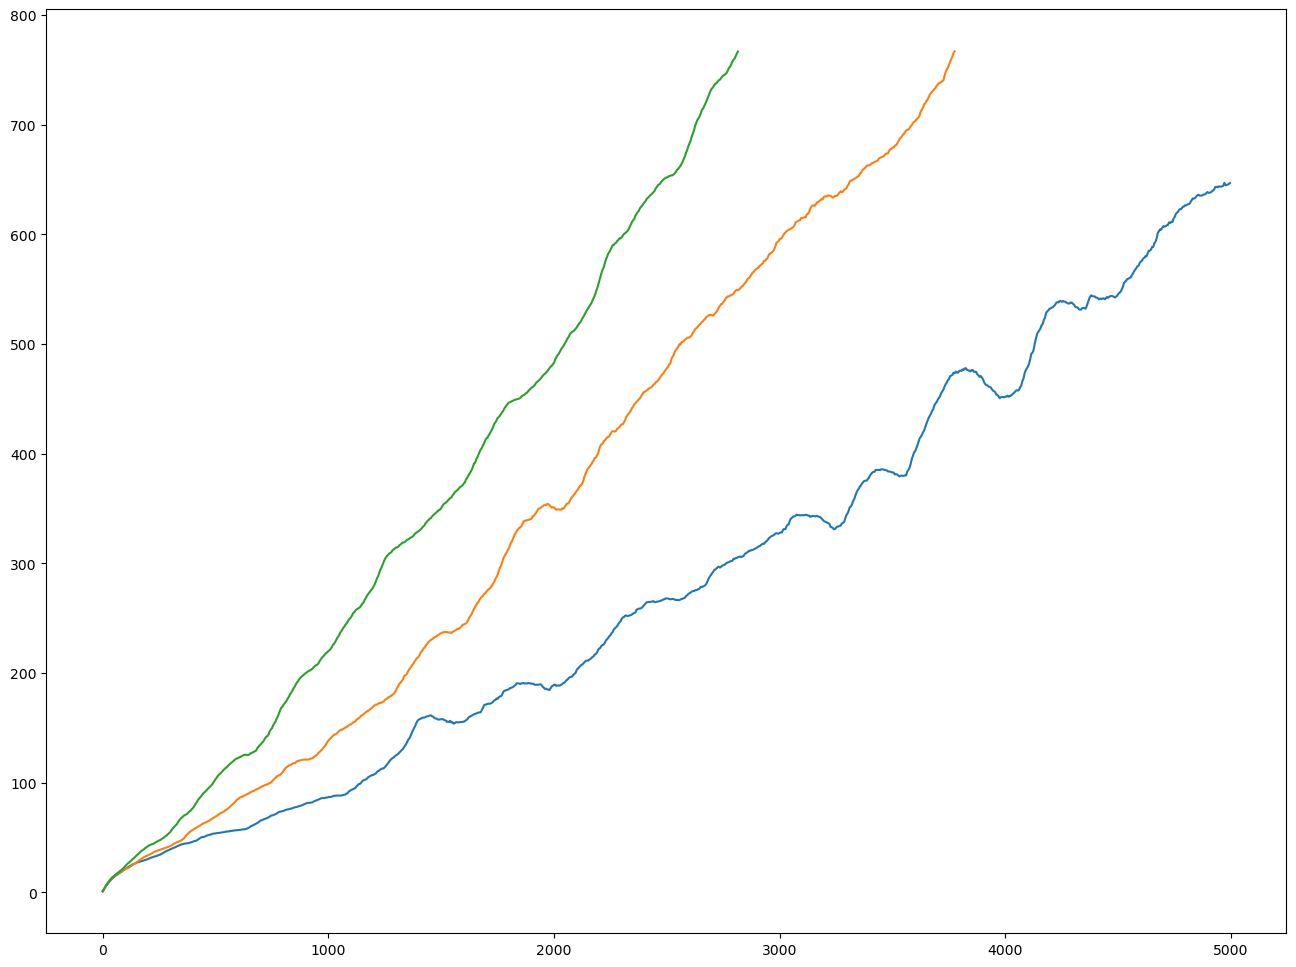

In [2]:
def lineal(x,a,b):
    return a*x + b

Lx = 1024
Ly = 1024

s = System(Lx,Ly)
s.set_plane_initial_conditions()
s.beta = 1
s.DI = 1
s.gamma = .2
s.dt = .05

pv = 1.01 - np.logspace(-1,0,20)

it_max = 100000
dm = 100
it_d = 5
c = np.zeros(len(pv))
err_c = np.zeros(len(pv))


plt.figure(figsize=(16,12))
for p in tqdm(pv):
    s.set_dic_beta(p=p)
    u_cm = cp.zeros(it_max//dm)
    m_max = 0
    for _ in range(it_d):
        m = 0
        while s.t_it < it_max and s.u_cm() < Lx-256:
            if s.t_it % dm == 0:            
                u_cm[m] += s.u_cm()
                m += 1
            s.update()
            s.rigid_x()

        if m > m_max:
            m_max = m
        s.reset()
        s.set_plane_initial_conditions()
    u_cm = u_cm[:m_max]
    u_cm /= it_d
    t = np.arange(0,m_max)*dm*s.dt
    popt, pcov = curve_fit(lineal, t[t>100], u_cm.get()[t>100])
    c[pv == p] = popt[0]
    err_c[pv == p] = np.sqrt(np.diag(pcov))[0]


    plt.plot(t,u_cm.get(),label='p = {:.1f}'.format(p))

plt.xlabel('t')
plt.ylabel('u_cm(t)')
plt.legend()

plt.show()

np.savez('/home/renzo/Tesis_M/tesis/Tesis_Tex/Notebooks/cap4/da_c_vs_p.npz',pv=pv,c=c,err_c=err_c)


    
                


/tmp/ipykernel_6602/3461367680.py:11: RuntimeWarning: invalid value encountered in power
  return c*(b-x)**a


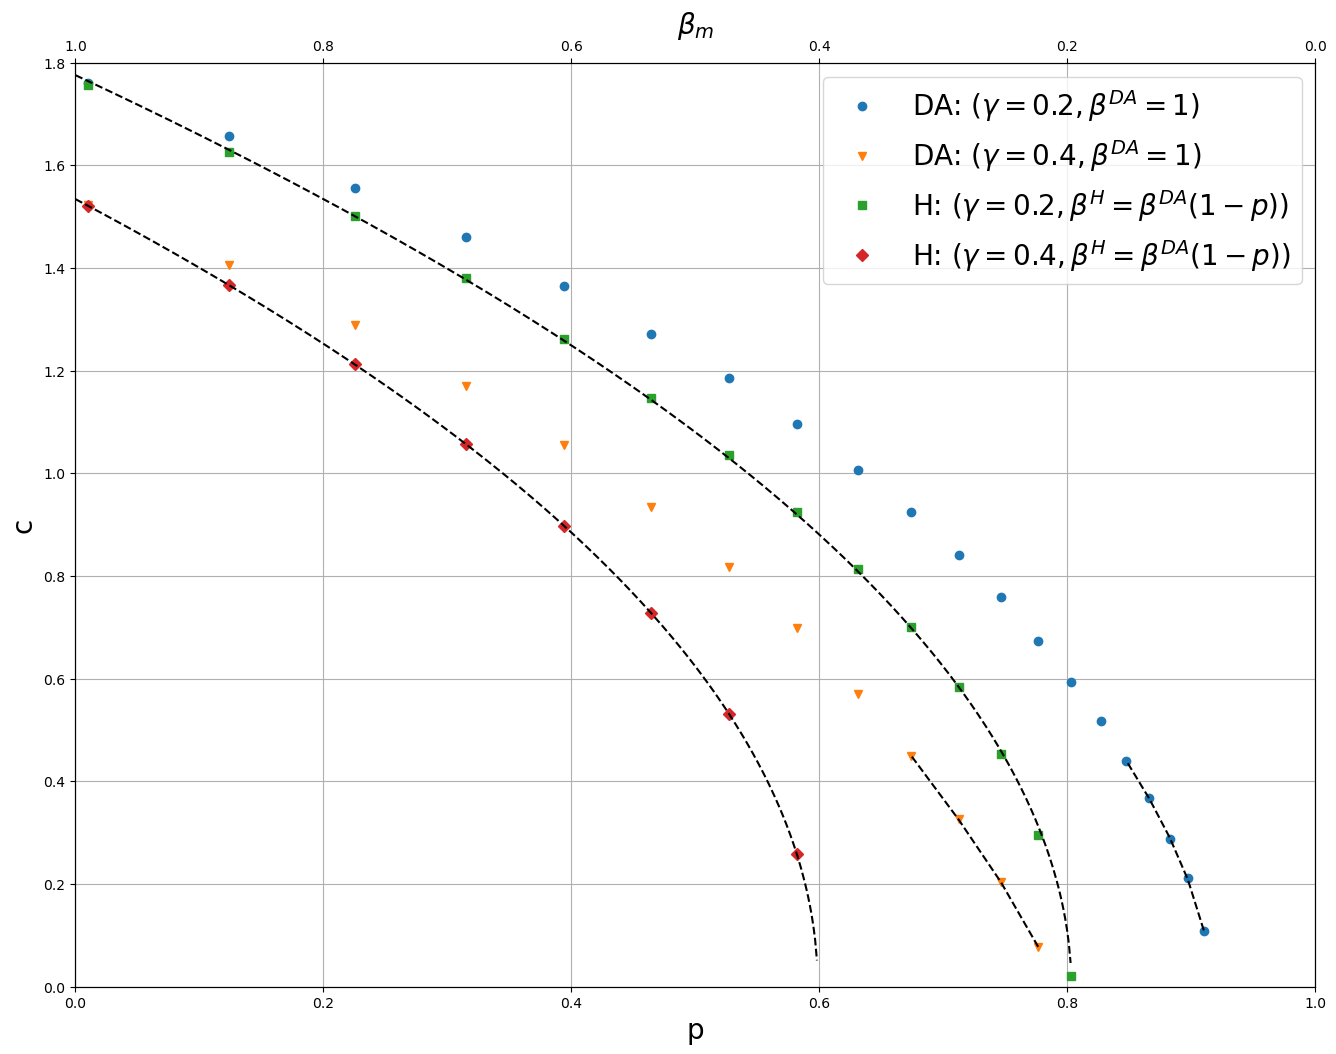

[0.58597019 0.91644568 2.10958778] [0.80325081 0.78939948 2.55010435] [0.51035325 0.8032075  1.98592369] [0.49909831 0.59865464 1.98214488]


In [91]:
c_da1 = np.load('/home/renzo/Tesis_M/tesis/Tesis_Tex/Notebooks/cap4/da_c_vs_p.npz',allow_pickle=True)
c_da2 = np.load('/home/renzo/Tesis_M/tesis/Tesis_Tex/Notebooks/cap4/da_c_vs_p2.npz',allow_pickle=True)
c_h1 = np.load('/home/renzo/Tesis_M/tesis/Tesis_Tex/Notebooks/cap4/h_c_vs_p.npz',allow_pickle=True)
c_h2 = np.load('/home/renzo/Tesis_M/tesis/Tesis_Tex/Notebooks/cap4/h_c_vs_p2.npz',allow_pickle=True)

beta = np.linspace(0,1,6)
p = np.linspace(0,1,700)

#fit power law by lineal
def power(x,a,b,c):
    return c*(b-x)**a
fit, pcov = curve_fit(power, c_da1['pv'][(c_da1['c']>.05)*(c_da1['c']<.5)],c_da1['c'][(c_da1['c']>.05)*(c_da1['c']<.5)],p0 = [.5,.95,1.5])
fit2, pcov2 = curve_fit(power, c_da2['pv'][(c_da2['c']>.05)*(c_da2['c']<.5)], c_da2['c'][(c_da2['c']>.05)*(c_da2['c']<.5)],p0=[.5,.85,1.5])
fit3, pcov3 = curve_fit(power, c_h1['pv'][c_h1['c']>.02], c_h1['c'][c_h1['c']>.02],p0=[.5,.85,1.5])
fit4, pcov4 = curve_fit(power, c_h2['pv'][c_h2['c']>.02], c_h2['c'][c_h2['c']>.02],p0=[.5,.65,1.5])


fig,ax = plt.subplots(figsize=(16,12))
ax.plot(c_da1['pv'],c_da1['c'],'o',label=r'DA: ($\gamma = 0.2,\beta^{DA} = 1$)')
ax.plot(c_da2['pv'][c_da2['c']>.05],c_da2['c'][c_da2['c']>.05],'v',label=r'DA: ($\gamma = 0.4,\beta^{DA} = 1$)')
ax.plot(c_h1['pv'][c_h1['c']>.02],c_h1['c'][c_h1['c']>.02],'s',label=r'H: ($\gamma = 0.2,\beta^{H} = \beta^{DA}(1-p)$)')
ax.plot(c_h2['pv'][c_h2['c']>.02],c_h2['c'][c_h2['c']>.02],'D',label=r'H: ($\gamma = 0.4,\beta^{H} = \beta^{DA}(1-p)$)')
ax.plot(c_da1['pv'][(c_da1['c']>.05)*(c_da1['c']<.5)],power(c_da1['pv'][(c_da1['c']>.05)*(c_da1['c']<.5)],*fit),'--',c='k')
ax.plot(c_da2['pv'][(c_da2['c']>.05)*(c_da2['c']<.5)],power(c_da2['pv'][(c_da2['c']>.05)*(c_da2['c']<.5)],*fit2),'--',c='k')
ax.plot(p,power(p,*fit3),'--',c='k')
ax.plot(p,power(p,*fit4),'--',c='k')
ax.set_xlabel('p',fontsize=20)
ax.set_ylabel('c',fontsize=20)
ax.legend(fontsize=20)

#set ticks for beta on the top
ax2 = plt.gca().twiny()
ax2.set_xticks(beta)
ax2.set_xticklabels([r'${:.1f}$'.format(1-b) for b in beta])
ax2.set_xlabel(r'$\beta_m$',fontsize=20)
ax2.set_xlim(0,1)

#ticks labels off
ax.tick_params(axis='both', which='major', labelsize=20)




ax.set_ylim(0,1.8)
ax.set_xlim(0,1)

#set grid
ax.grid()




plt.show()

print(fit,fit2,fit3,fit4)

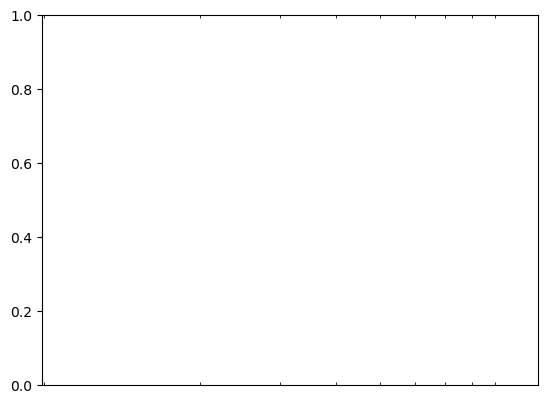

In [98]:
fig,ax = plt.subplots()

ax.set_xscale('log')

#erase ticks and labels
ax.set_xticks([])


#change ticks style

ax.tick_params(axis='both', which='minor', labelsize=20, direction='in',top=True,right=True)


In [90]:
pc = .91
pv = 1 - np.logspace(np.log10(1-pc),0,30)
pv

array([0.91      , 0.90220805, 0.89374149, 0.88454192, 0.87454588,
       0.86368441, 0.85188258, 0.83905899, 0.82512516, 0.80998498,
       0.793534  , 0.77565875, 0.7562359 , 0.73513148, 0.71219989,
       0.68728295, 0.66020877, 0.63079059, 0.59882546, 0.56409287,
       0.52635324, 0.48534621, 0.44078891, 0.39237395, 0.33976737,
       0.28260625, 0.22049628, 0.153009  , 0.07967886, 0.        ])

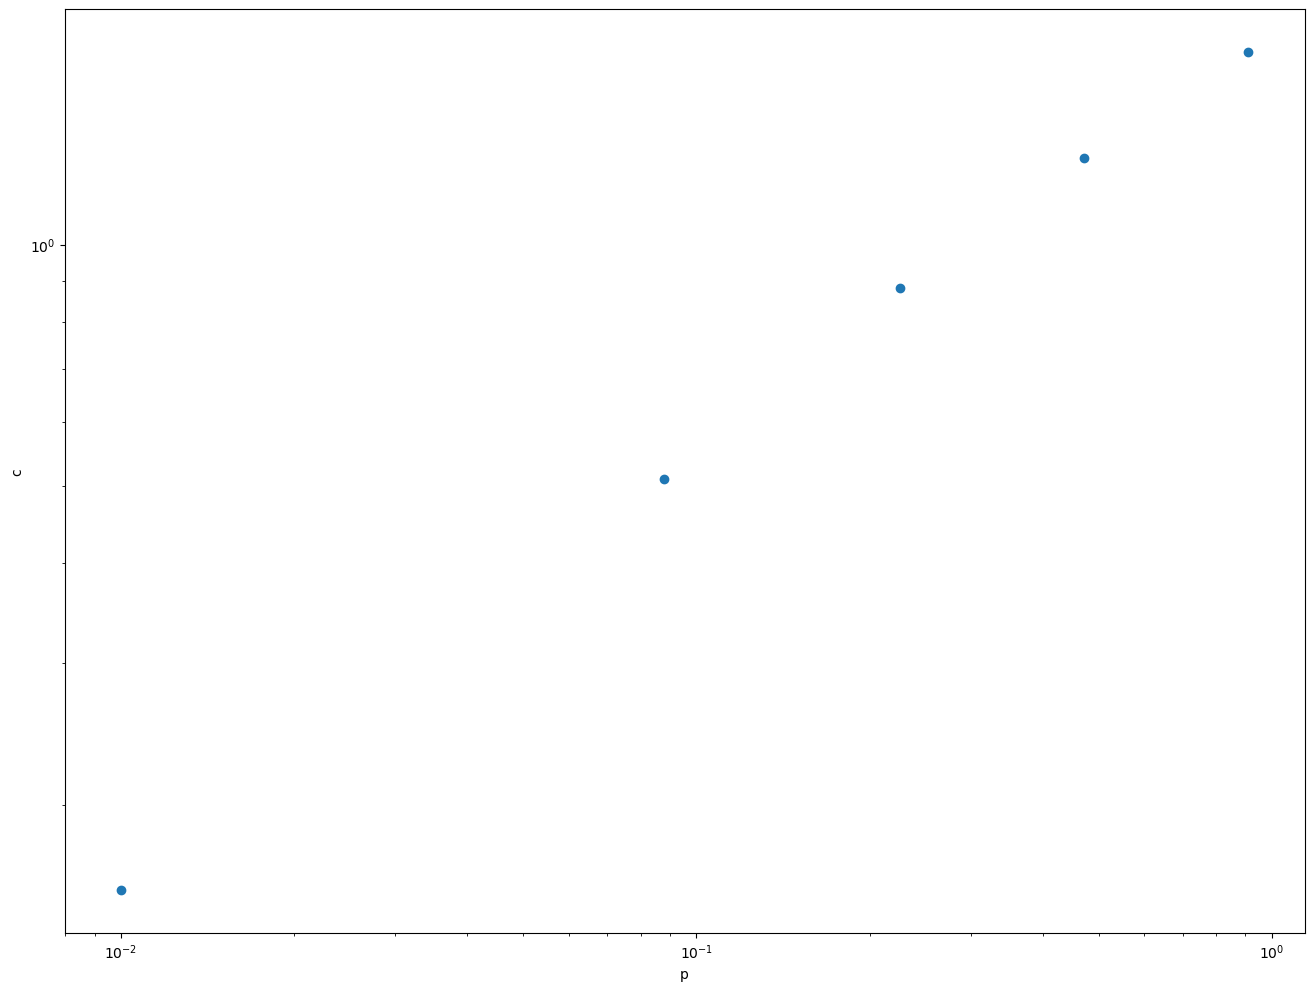

In [17]:
plt.figure(figsize=(16,12))
plt.errorbar(.91- pv,c,yerr=err_c,fmt='o')
plt.xlabel('p')
plt.ylabel('c')
plt.xscale('log')
plt.yscale('log')

In [6]:
print(m_max)

1000


In [26]:
a = 1 - np.logspace(-1,0,20)
np.diff(a)

array([-0.01288379, -0.01454371, -0.01641749, -0.01853269, -0.0209204 ,
       -0.02361574, -0.02665834, -0.03009294, -0.03397005, -0.03834668,
       -0.04328719, -0.04886422, -0.05515978, -0.06226645, -0.07028873,
       -0.07934459, -0.08956717, -0.10110682, -0.11413321])

In [27]:
print(a)

[0.9        0.88711621 0.8725725  0.85615501 0.83762233 0.81670193
 0.79308619 0.76642785 0.73633491 0.70236486 0.66401817 0.62073098
 0.57186676 0.51670698 0.45444052 0.38415179 0.3048072  0.21524003
 0.11413321 0.        ]
